In [133]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [134]:
# upload one file (later all - customer no starts with 1 every day)
df = pd.read_csv('./data/monday.csv', sep=';') # , index_col=0
#df = pd.read_csv('./data/monday.csv', sep=';', parse_dates =["timestamp"], index_col ="timestamp") 
df.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [135]:
# create checkout for the customers at the end of the day

cust_checkout_no_record = []
for i in range(1, (df['customer_no'].nunique())+1):
    df_at = df[df['customer_no']==i] 
    # print(df_at)
    
    last_cust_occ = df_at.customer_no[-1:].values
    last_loc_occ = df_at.location[-1:].values
    # print(last_cust_occ, last_loc_occ)
    
    if last_loc_occ[0] != 'checkout':
        cust_checkout_no_record.append(last_cust_occ[0])

cust_checkout_no_record

[1430, 1433, 1437, 1439, 1440, 1441, 1443, 1445, 1446, 1447]

In [136]:
lst_dict = []

for cust_no in cust_checkout_no_record:
    
    # assuming that the remaining customers are checked out at 21:55
    new_row_dict = {'timestamp':'2019-09-02 21:55:00', 'customer_no':cust_no, 'location':'checkout'}    
    lst_dict.append(new_row_dict)

#append rows to the dataframe
df = df.append(lst_dict, ignore_index=True)
df.tail()

,timestamp,customer_no,location
4889,2019-09-02 21:55:00,1441,checkout
4890,2019-09-02 21:55:00,1443,checkout
4891,2019-09-02 21:55:00,1445,checkout
4892,2019-09-02 21:55:00,1446,checkout
4893,2019-09-02 21:55:00,1447,checkout


In [137]:
# create dummy column 
df['dummy']= 1
df.head()

,timestamp,customer_no,location,dummy
0,2019-09-02 07:03:00,1,dairy,1
1,2019-09-02 07:03:00,2,dairy,1
2,2019-09-02 07:04:00,3,dairy,1
3,2019-09-02 07:04:00,4,dairy,1
4,2019-09-02 07:04:00,5,spices,1


In [138]:
df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index('timestamp')

In [139]:
df2 = df.groupby('timestamp')[['dummy']].count()
df2.head(8)

,dummy
timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,6
2019-09-02 07:05:00,4
2019-09-02 07:06:00,8
2019-09-02 07:07:00,4
2019-09-02 07:08:00,4
2019-09-02 07:09:00,3
2019-09-02 07:10:00,1


In [140]:
## resample
df2_resampled = df2.resample(rule='1MIN').ffill()
df2_resampled.head(8)

,dummy
timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,6
2019-09-02 07:05:00,4
2019-09-02 07:06:00,8
2019-09-02 07:07:00,4
2019-09-02 07:08:00,4
2019-09-02 07:09:00,3
2019-09-02 07:10:00,1


#### Calculate the total number of customers in the supermarket over time.

<AxesSubplot:xlabel='timestamp', ylabel='dummy'>

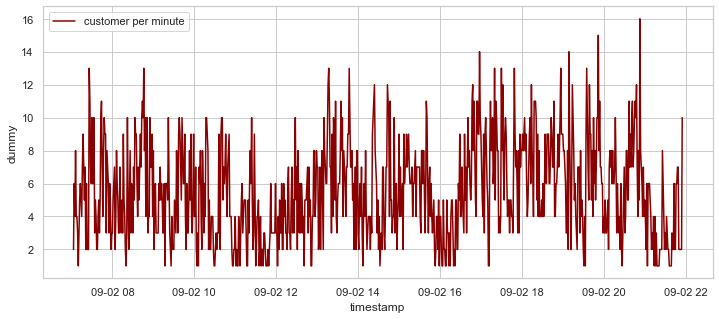

In [141]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.lineplot(data=df2_resampled, x="timestamp", y="dummy", color ='darkred', label='customer per minute')

<AxesSubplot:xlabel='timestamp', ylabel='dummy'>

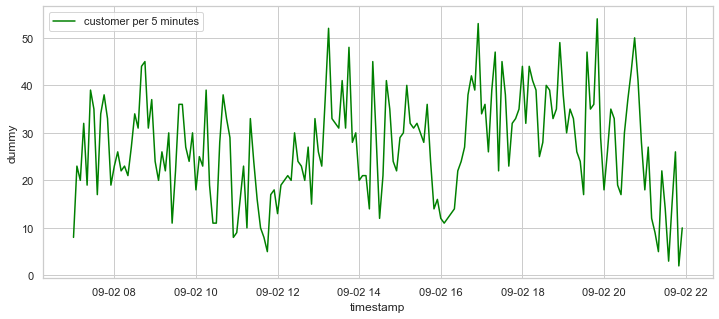

In [142]:
# aggregate over 5 min/ downsampling
sns.lineplot(data=df2.resample(rule='5MIN').sum(), x="timestamp", y="dummy", color ='green', label='customer per 5 minutes')

### best aggregate to see peaks = 30 min: 

<AxesSubplot:xlabel='timestamp', ylabel='dummy'>

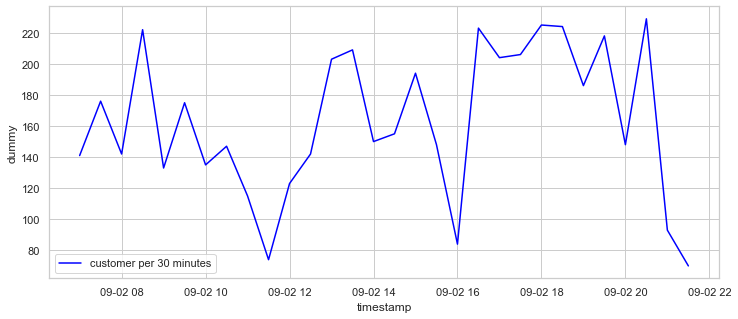

In [143]:
sns.lineplot(data=df2.resample(rule='30MIN').sum(), x="timestamp", y="dummy", color ='blue', label='customer per 30 minutes')

[Text(0, 0, '7:00'),
 Text(1, 0, '7:30'),
 Text(2, 0, '8:00'),
 Text(3, 0, '8:30'),
 Text(4, 0, '9:00'),
 Text(5, 0, '9:30'),
 Text(6, 0, '10:00'),
 Text(7, 0, '10:30'),
 Text(8, 0, '11:00'),
 Text(9, 0, '11:30'),
 Text(10, 0, '12:00'),
 Text(11, 0, '12:30'),
 Text(12, 0, '13:00'),
 Text(13, 0, '13:30'),
 Text(14, 0, '14:00'),
 Text(15, 0, '14:30'),
 Text(16, 0, '15:00'),
 Text(17, 0, '15:30'),
 Text(18, 0, '16:00'),
 Text(19, 0, '16:30'),
 Text(20, 0, '17:00'),
 Text(21, 0, '17:30'),
 Text(22, 0, '18:00'),
 Text(23, 0, '18:30'),
 Text(24, 0, '19:00'),
 Text(25, 0, '19:30'),
 Text(26, 0, '20:00'),
 Text(27, 0, '20:30'),
 Text(28, 0, '21:00'),
 Text(29, 0, '21:30')]

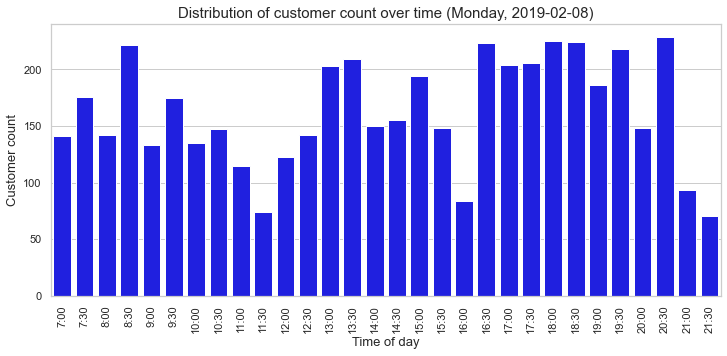

In [144]:
ax = sns.barplot(x="timestamp", y="dummy", data=df2.resample(rule='30MIN').sum().reset_index(), color='blue')
ax.set_title('Distribution of customer count over time (Monday, 2019-02-08)', fontsize=15)
ax.set_ylabel('Customer count', fontsize=13)
ax.set_xlabel('Time of day', fontsize=13)
plt.xticks(rotation=90)
labels = ['7:00', '7:30', '8:00', '8:30', '9:00', '9:30', '10:00', '10:30',
          '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30',
          '15:00', '15:30', '16:00', '16:30', '17:00', '17:30', '18:00', '18:30',
           '19:00', '19:30', '20:00', '20:30', '21:00', '21:30'
         ]
ax.set_xticklabels(labels)

<AxesSubplot:xlabel='timestamp', ylabel='dummy'>

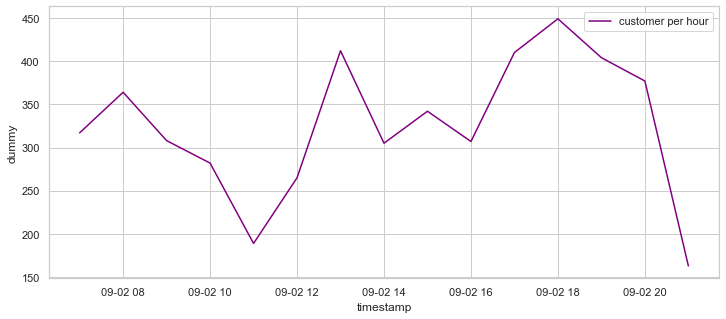

In [145]:
sns.lineplot(data=df2.resample(rule='1H').sum(), x="timestamp", y="dummy", color ='purple', label='customer per hour')

[Text(0, 0, '7'),
 Text(1, 0, '8'),
 Text(2, 0, '9'),
 Text(3, 0, '10'),
 Text(4, 0, '11'),
 Text(5, 0, '12'),
 Text(6, 0, '13'),
 Text(7, 0, '14'),
 Text(8, 0, '15'),
 Text(9, 0, '16'),
 Text(10, 0, '17'),
 Text(11, 0, '18'),
 Text(12, 0, '19'),
 Text(13, 0, '20'),
 Text(14, 0, '21')]

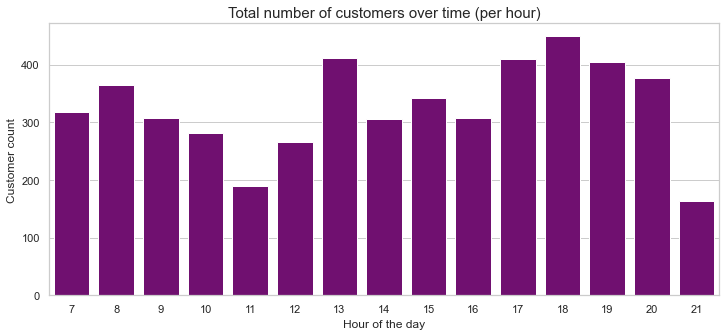

In [146]:
# as barplot
df3 = df2.resample(rule='1H').sum().reset_index()

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="timestamp", y="dummy", data=df3, color='purple')
ax.set_title('Total number of customers over time (per hour)', fontsize=15)
ax.set_ylabel('Customer count')
ax.set_xlabel('Hour of the day')
#plt.xticks(rotation=90)
#plt.setp( ax.get_xticklabels(), visible=False)
#x = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
#plt.xticks(x, labels, rotation='vertical')
#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[1] = 'Testing'
labels = list(range(7,22))
ax.set_xticklabels(labels)
#plt.xticks(rotation=90)


In [165]:
### try to plot it as a stacked barplot with location categories in different colors
df4 = df.groupby(['timestamp','location'])[['dummy']].sum()
df4.head(5)
#data=df2.resample(rule='1MIN').ffill().reset_index()

dummy
timestamp           location       
2019-09-02 07:03:00 dairy         2
2019-09-02 07:04:00 dairy         2
                    fruit         1
                    spices        3
2019-09-02 07:05:00 checkout      2

In [ ]:
# create 4 different dataframes for the locatin and then stack on top of each other: